Revenue Prediction Results:
Mean Absolute Error (MAE): 1344116.60
R² Score: 0.05


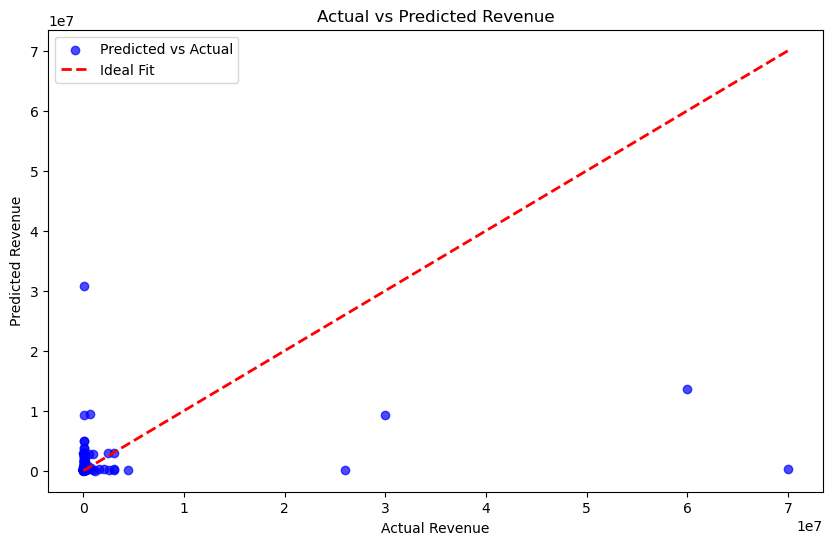

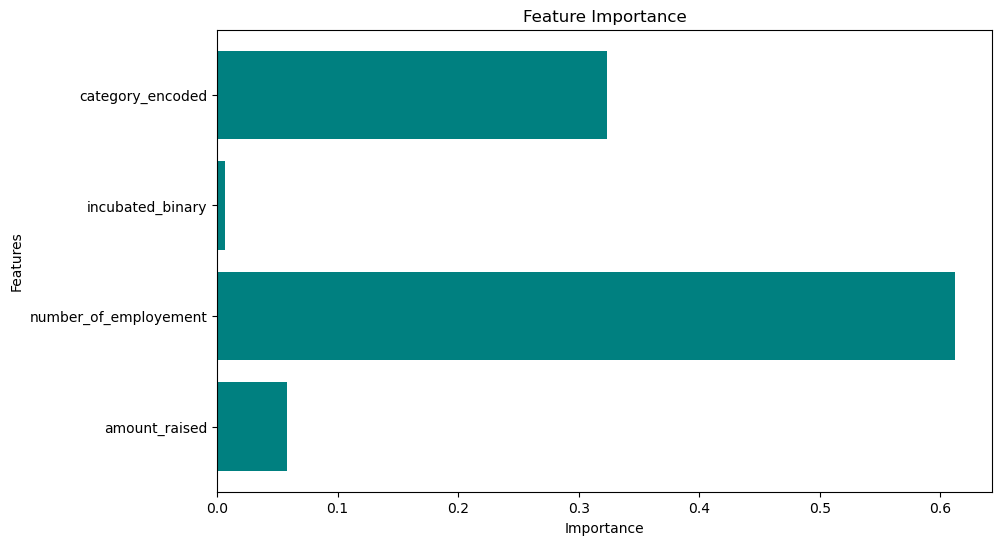

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
file_path = 'StartupTN.csv'  # Ensure the file is in the same directory
data = pd.read_csv(file_path)

# Data Preprocessing
# Clean column names
data.columns = [col.strip().replace('\n', ' ').replace(' ', '_').lower() for col in data.columns]

# Replace non-numeric values (e.g., '-') with NaN in numeric columns
data['revenue_amount_(last_fy)'] = pd.to_numeric(data['revenue_amount_(last_fy)'], errors='coerce')
data['amount_raised'] = pd.to_numeric(data['amount_raised'], errors='coerce')
data['number_of_employement'] = pd.to_numeric(data['number_of_employement'], errors='coerce')

# Fill missing values in the 'revenue_amount_(last_fy)' and 'amount_raised' columns with median
data['revenue_amount_(last_fy)'] = data['revenue_amount_(last_fy)'].fillna(data['revenue_amount_(last_fy)'].median())
data['amount_raised'] = data['amount_raised'].fillna(data['amount_raised'].median())

# Convert 'incubated_(yes/no)' into a binary variable
data['incubated_binary'] = (data['incubated_(yes/no)'] == 'Yes').astype(int)

# Encode 'category' using factorization (categorical to numerical encoding)
data['category_encoded'] = pd.factorize(data['category'])[0]

# Selecting features and target for modeling
features = ['amount_raised', 'number_of_employement', 'incubated_binary', 'category_encoded']
target = 'revenue_amount_(last_fy)'

X = data[features]
y = data[target]

# Handle missing values in features by dropping rows with NaNs
X = X.dropna()
y = y[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Revenue Prediction Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization: Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label="Ideal Fit")
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.legend()
plt.show()

# Feature importance plot
features_importance = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, features_importance, color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



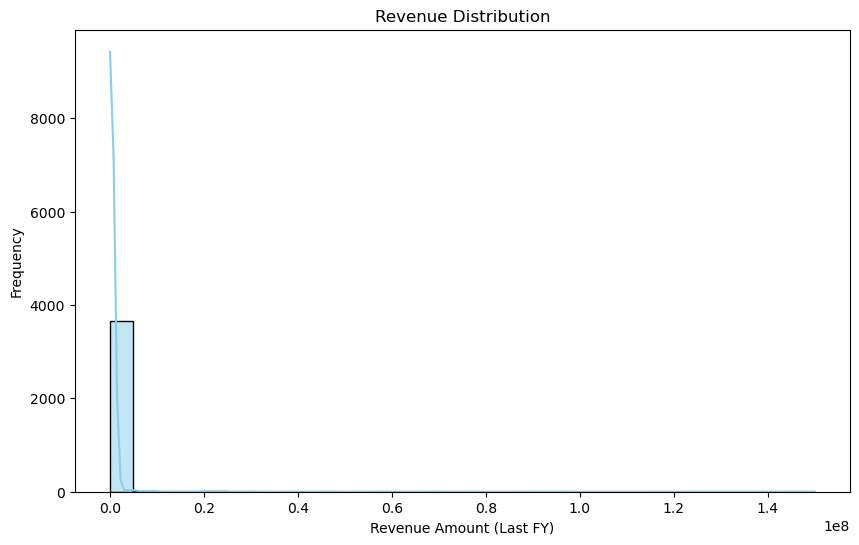

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['revenue_amount_(last_fy)'], kde=True, color='skyblue', bins=30)
plt.title('Revenue Distribution')
plt.xlabel('Revenue Amount (Last FY)')
plt.ylabel('Frequency')
plt.show()

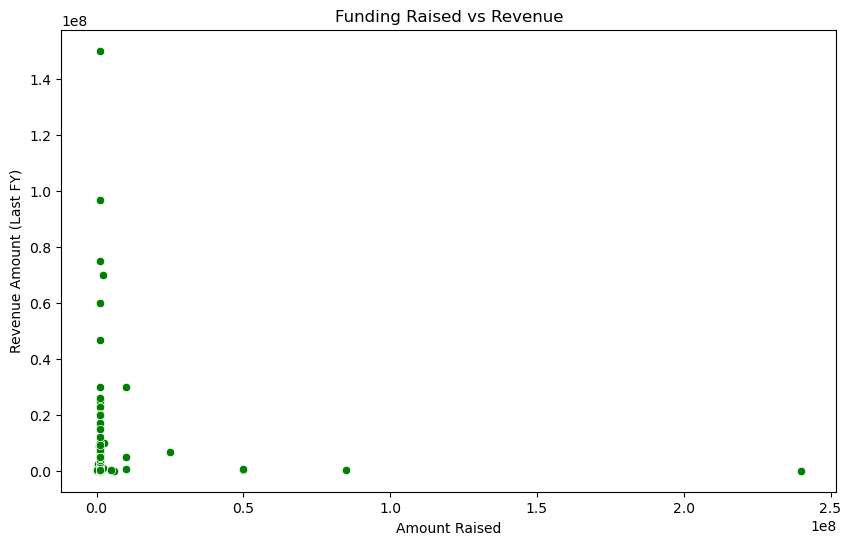

In [8]:
# 2. Funding Raised vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount_raised', y='revenue_amount_(last_fy)', data=data, color='green')
plt.title('Funding Raised vs Revenue')
plt.xlabel('Amount Raised')
plt.ylabel('Revenue Amount (Last FY)')
plt.show()


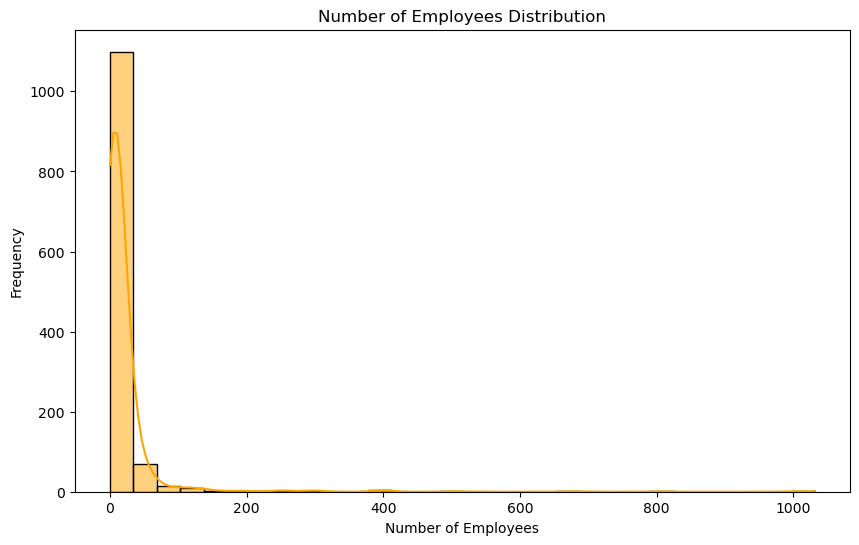

In [9]:
# 3. Number of Employees Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['number_of_employement'], kde=True, color='orange', bins=30)
plt.title('Number of Employees Distribution')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()


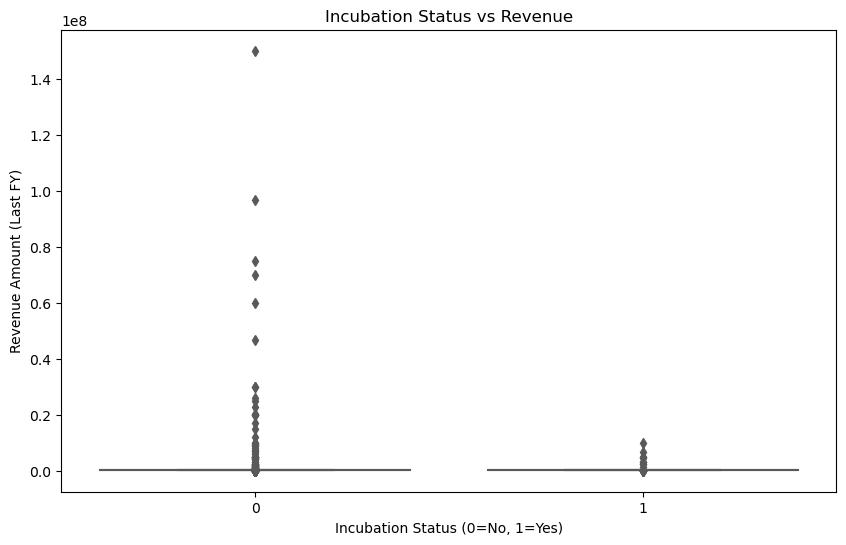

In [10]:
# 4. Incubation Status and Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(x='incubated_binary', y='revenue_amount_(last_fy)', data=data, palette='Set2')
plt.title('Incubation Status vs Revenue')
plt.xlabel('Incubation Status (0=No, 1=Yes)')
plt.ylabel('Revenue Amount (Last FY)')
plt.show()


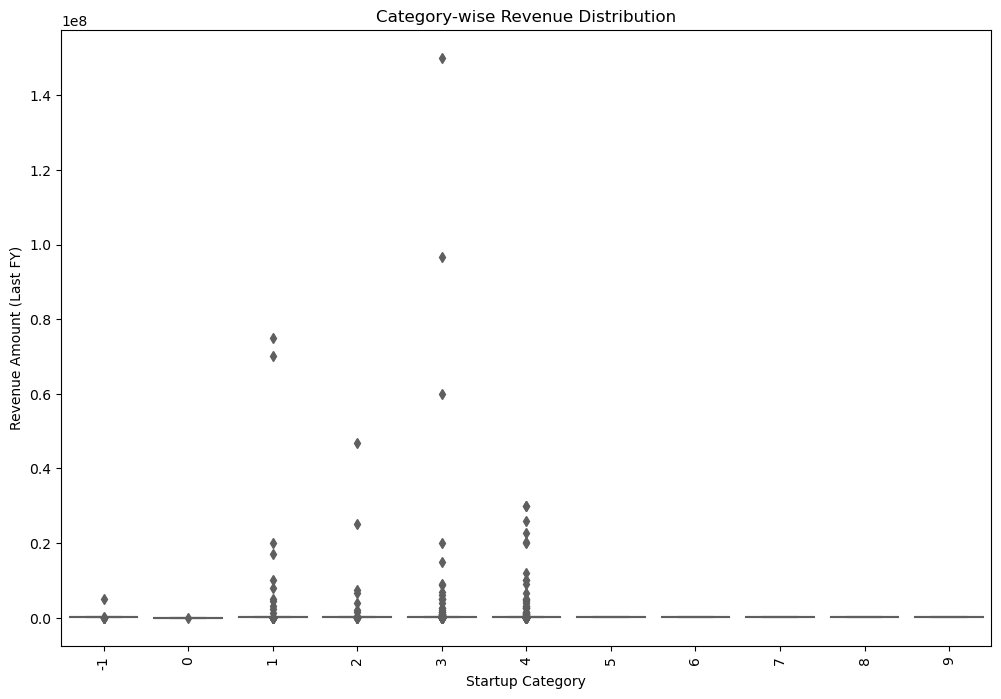

In [11]:
# 5. Category-wise Revenue Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_encoded', y='revenue_amount_(last_fy)', data=data, palette='Set3')
plt.title('Category-wise Revenue Distribution')
plt.xlabel('Startup Category')
plt.ylabel('Revenue Amount (Last FY)')
plt.xticks(rotation=90)
plt.show()

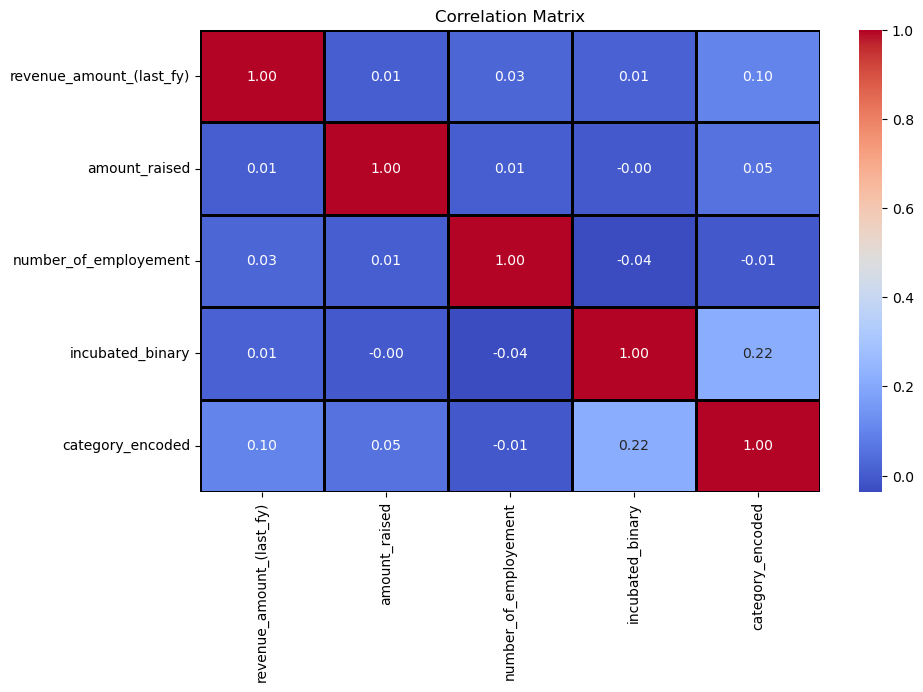

In [12]:
# 6. Correlation Matrix
correlation_matrix = data[['revenue_amount_(last_fy)', 'amount_raised', 'number_of_employement', 'incubated_binary', 'category_encoded']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()


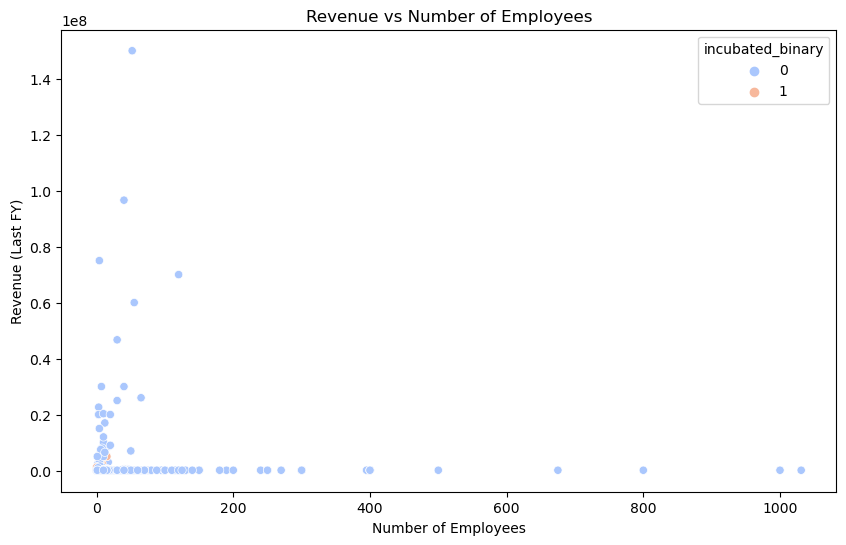

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='number_of_employement', y='revenue_amount_(last_fy)', hue='incubated_binary', palette='coolwarm')
plt.title('Revenue vs Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Revenue (Last FY)')
plt.show()



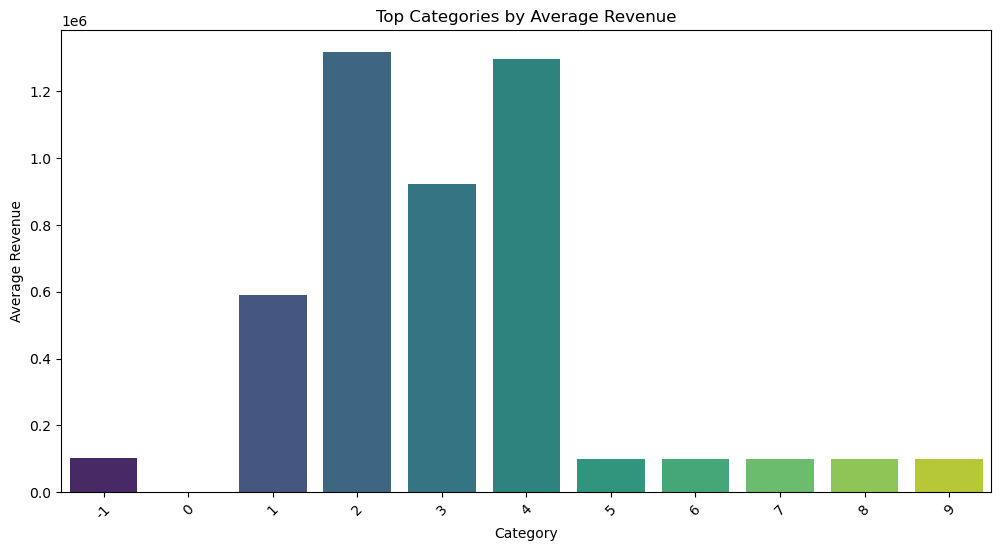

In [17]:
plt.figure(figsize=(12, 6))
category_revenue = data.groupby('category_encoded')['revenue_amount_(last_fy)'].mean().sort_values(ascending=False)
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')
plt.title('Top Categories by Average Revenue')
plt.xlabel('Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()


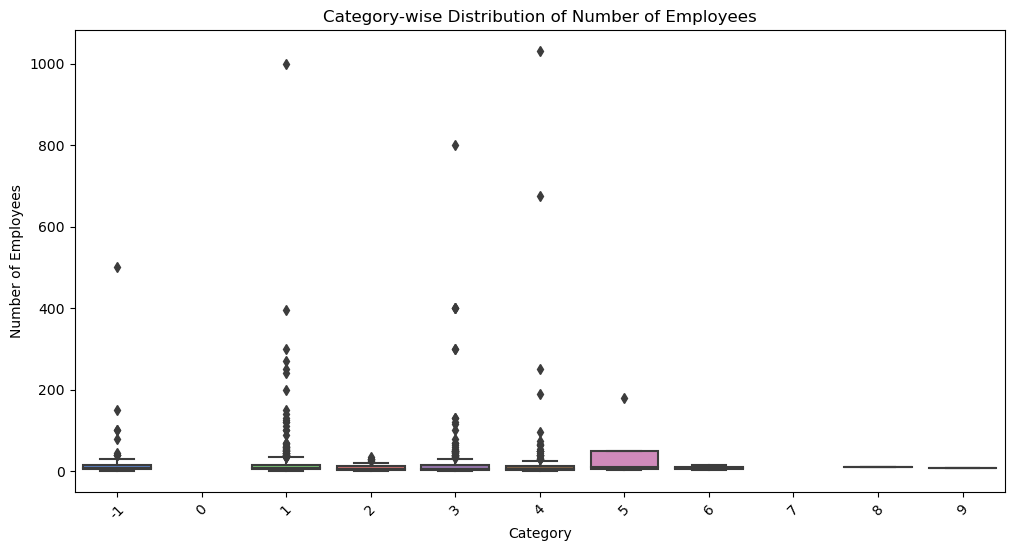

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='category_encoded', y='number_of_employement', palette='muted')
plt.title('Category-wise Distribution of Number of Employees')
plt.xlabel('Category')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


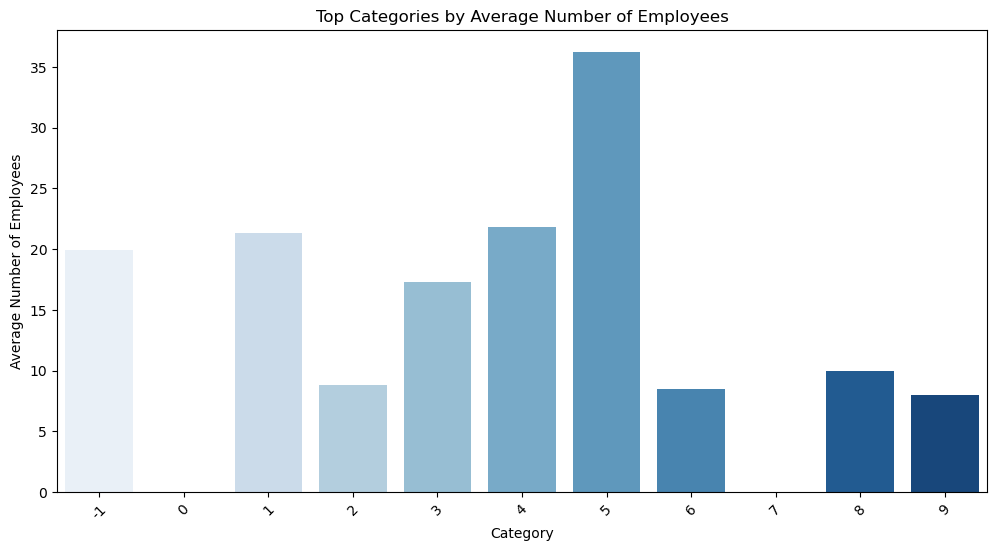

In [27]:
plt.figure(figsize=(12, 6))
category_employees = data.groupby('category_encoded')['number_of_employement'].mean().sort_values(ascending=False)
sns.barplot(x=category_employees.index, y=category_employees.values, palette='Blues')
plt.title('Top Categories by Average Number of Employees')
plt.xlabel('Category')
plt.ylabel('Average Number of Employees')
plt.xticks(rotation=45)
plt.show()



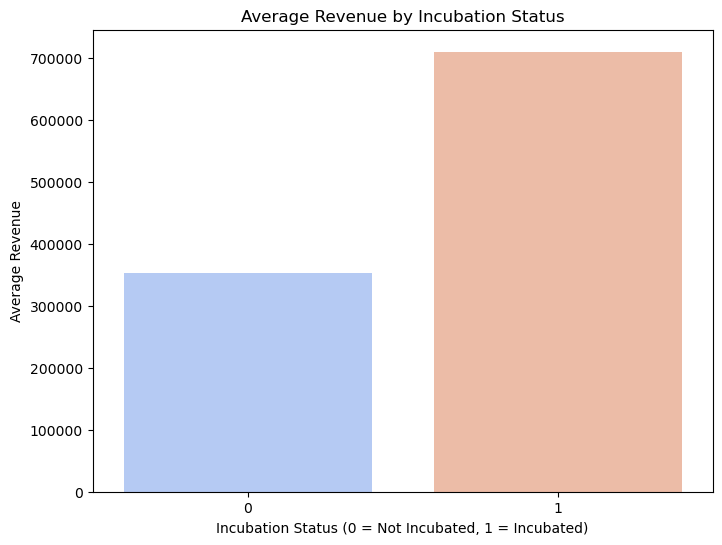

In [28]:
plt.figure(figsize=(8, 6))
incubation_revenue = data.groupby('incubated_binary')['revenue_amount_(last_fy)'].mean().sort_values(ascending=False)
sns.barplot(x=incubation_revenue.index, y=incubation_revenue.values, palette='coolwarm')
plt.title('Average Revenue by Incubation Status')
plt.xlabel('Incubation Status (0 = Not Incubated, 1 = Incubated)')
plt.ylabel('Average Revenue')
plt.show()



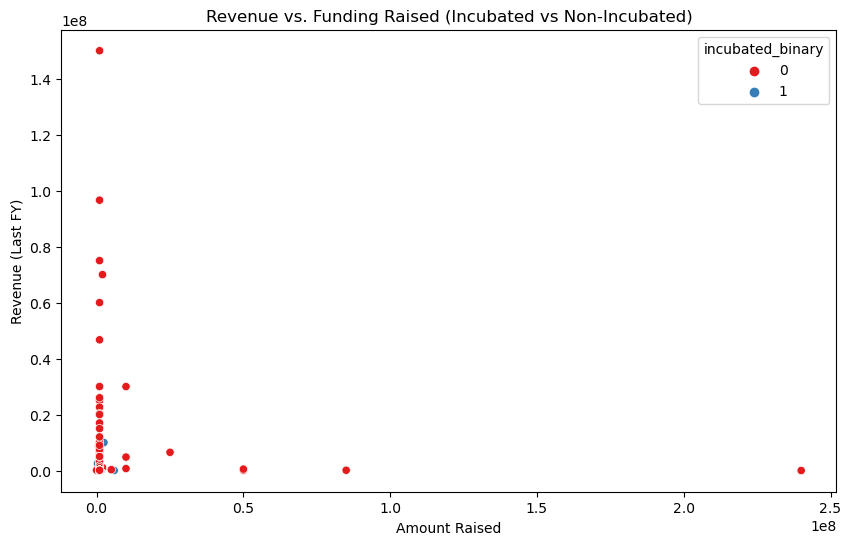

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='amount_raised', y='revenue_amount_(last_fy)', hue='incubated_binary', palette='Set1')
plt.title('Revenue vs. Funding Raised (Incubated vs Non-Incubated)')
plt.xlabel('Amount Raised')
plt.ylabel('Revenue (Last FY)')
plt.show()


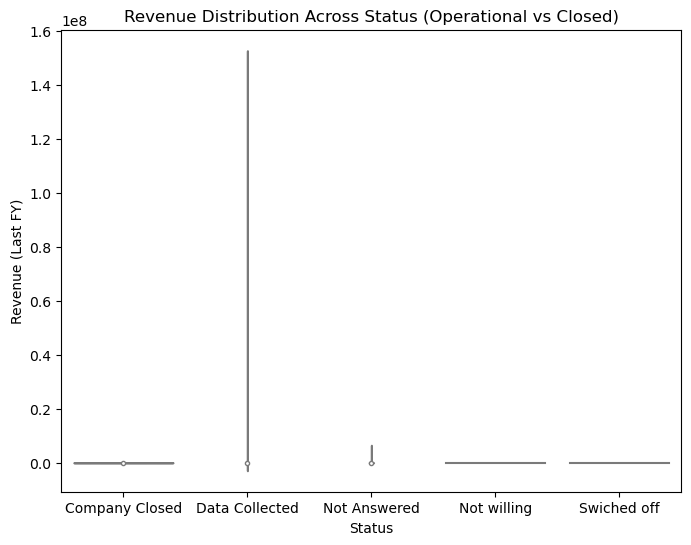

In [31]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='status', y='revenue_amount_(last_fy)', data=data, palette='Pastel1')
plt.title('Revenue Distribution Across Status (Operational vs Closed)')
plt.xlabel('Status')
plt.ylabel('Revenue (Last FY)')
plt.show()


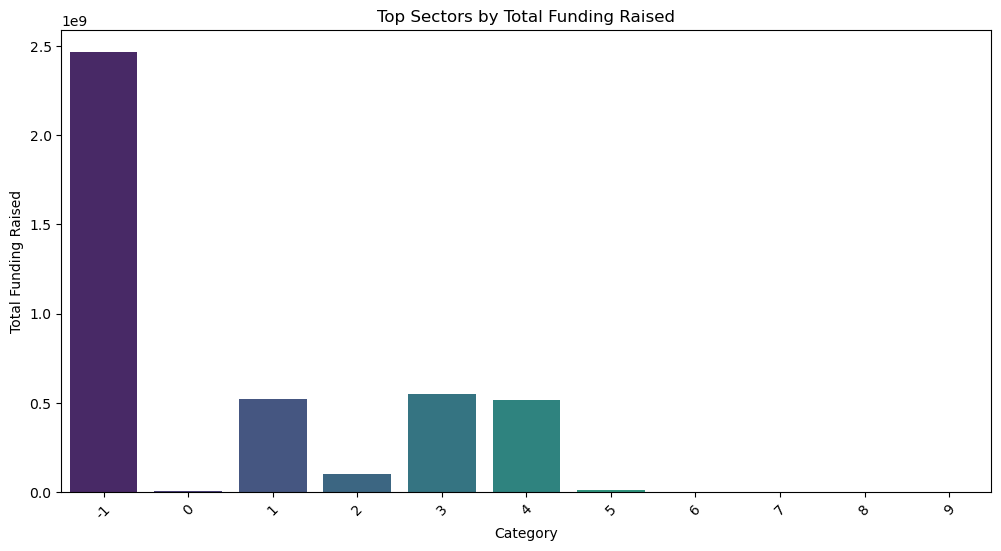

In [33]:
plt.figure(figsize=(12, 6))
sector_funding = data.groupby('category_encoded')['amount_raised'].sum().sort_values(ascending=False)
sns.barplot(x=sector_funding.index, y=sector_funding.values, palette='viridis')
plt.title('Top Sectors by Total Funding Raised')
plt.xlabel('Category')
plt.ylabel('Total Funding Raised')
plt.xticks(rotation=45)
plt.show()



In [35]:
# Display the column names in your dataset
print(data.columns)


Index(['name_of_the_entity', 'name_of_the_authorized_representative',
       'email_id', 'act_number', 'women_cofounder/women-led_startup',
       'incubated_(yes/no)', 'name_of_the_incubator',
       'name_of_the_incubator.1', 'support_you_are_getting_from_the_incubator',
       'incubated_on__(mm/yyyy)', 'govt_suppport_for_ipr',
       'if_yes___name_of_the_department', 'details_of_the_support_received',
       'date_of_the_support_received', 'have_you_raised_funds',
       'fund_raised_mode', 'amount_raised',
       'awre_of_g.o_and_state_govet_startup_policies',
       'are_you_aware_of_state_support_systems_like_mentortn_tanfund_catalyst_open_innovation',
       'what_support_are_you_looking_to_move_to_the_next_stage',
       'revenue_amount_(last_fy)', 'number_of_employement', 'category',
       'govt_order_procurement',
       'work_order_details__1._deparment__2.date__3.value', 'remarks',
       'status', 'unnamed:_27', 'status.1', 'count', 'incubated_binary',
       'category_

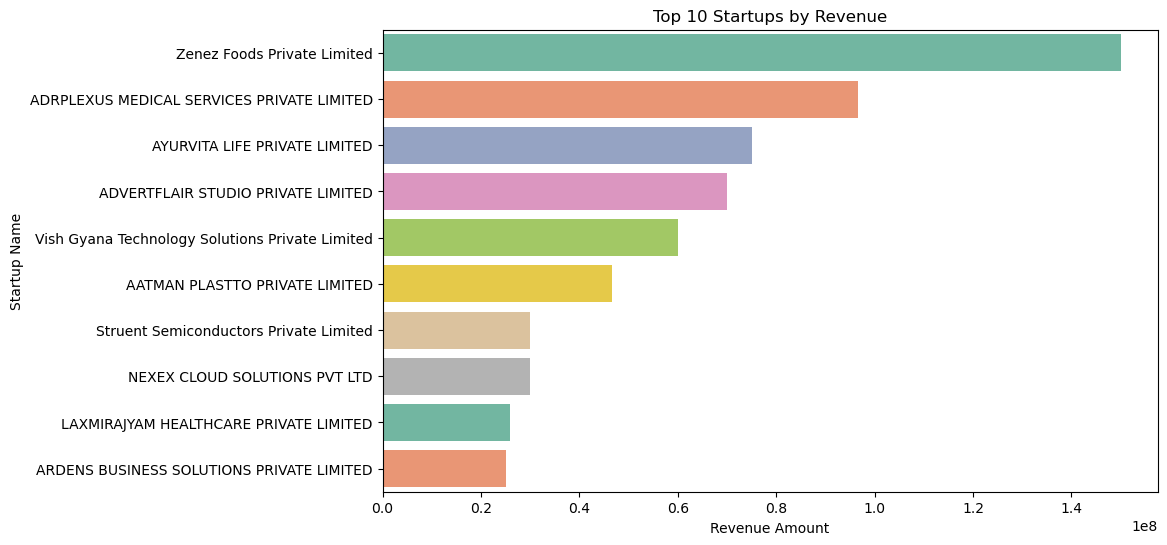

In [36]:
# Sorting the top 10 startups by revenue
top_revenue_startups = data[['name_of_the_entity', 'revenue_amount_(last_fy)']].sort_values(by='revenue_amount_(last_fy)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='revenue_amount_(last_fy)', y='name_of_the_entity', data=top_revenue_startups, palette='Set2')
plt.title('Top 10 Startups by Revenue')
plt.xlabel('Revenue Amount')
plt.ylabel('Startup Name')
plt.show()


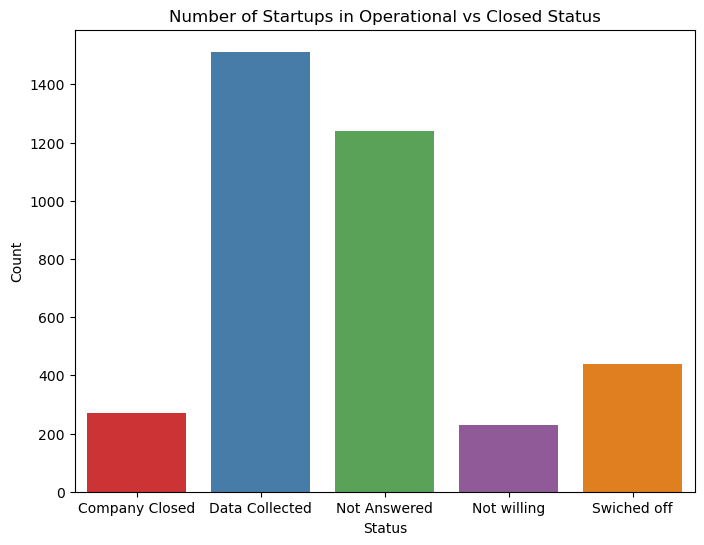

In [43]:

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='status', palette='Set1')
plt.title('Number of Startups in Operational vs Closed Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


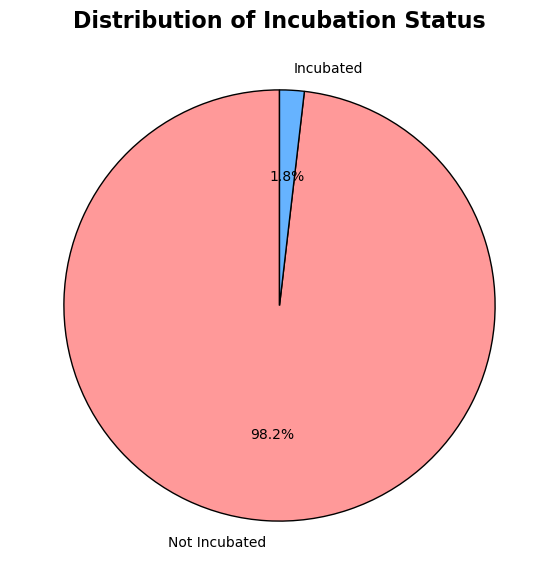

In [46]:
# Pie chart for Incubation Status Distribution
incubation_status_counts = data['incubated_binary'].value_counts()
labels = ['Not Incubated', 'Incubated']
colors = ['#FF9999', '#66B3FF']

plt.figure(figsize=(7, 7))
plt.pie(incubation_status_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Incubation Status', fontsize=16, fontweight='bold')
plt.show()


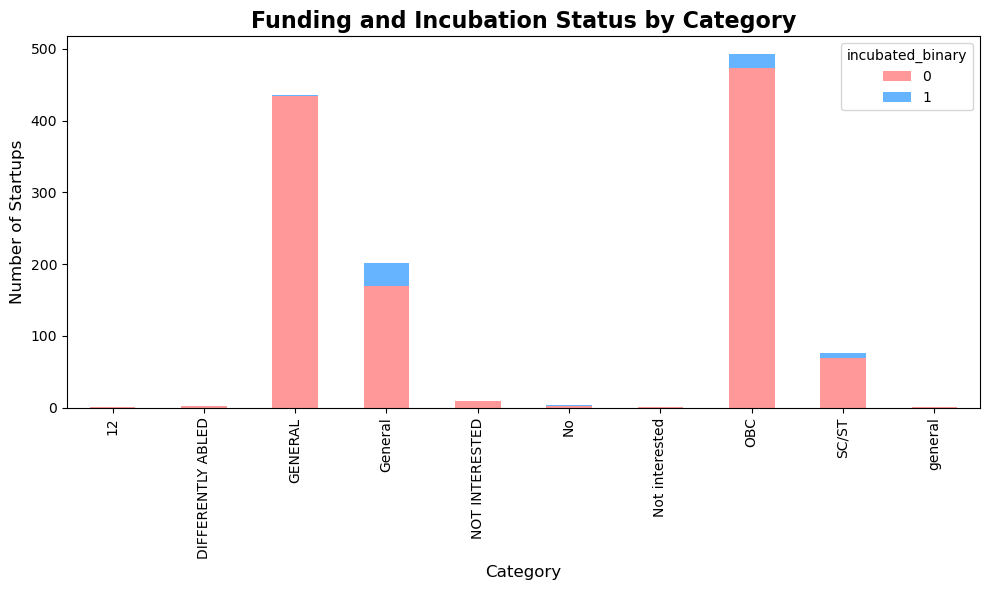

In [56]:
# Stacked Bar Chart for Funding and Incubation Status by Category
category_incubation_status = data.groupby(['category', 'incubated_binary']).size().unstack()
category_incubation_status.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF'])
plt.title('Funding and Incubation Status by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




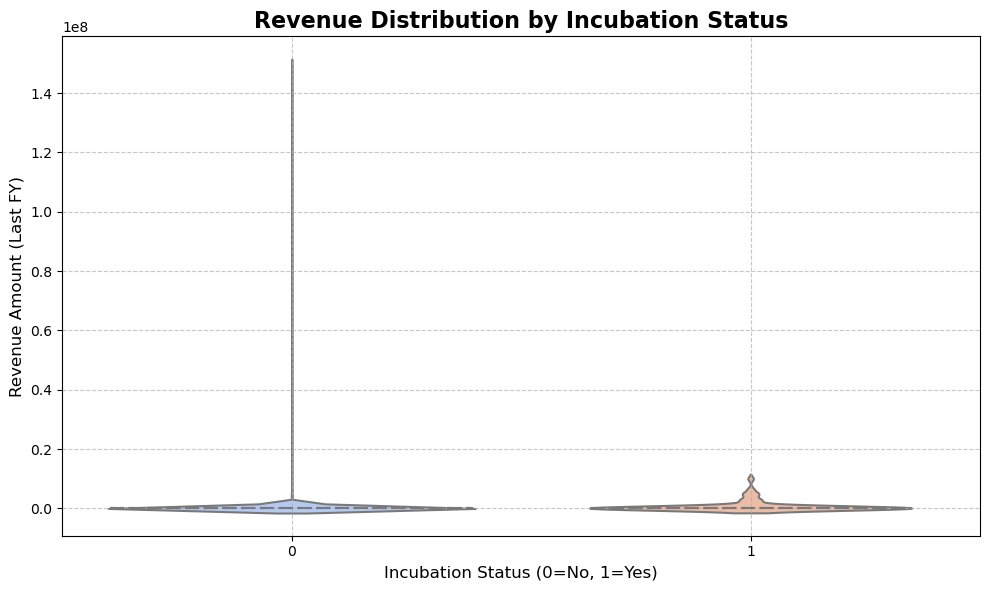

In [58]:
# Violin Plot for Revenue Distribution by Incubation Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='incubated_binary', y='revenue_amount_(last_fy)', data=data, palette='coolwarm', inner='quart')
plt.title('Revenue Distribution by Incubation Status', fontsize=16, fontweight='bold')
plt.xlabel('Incubation Status (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Revenue Amount (Last FY)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


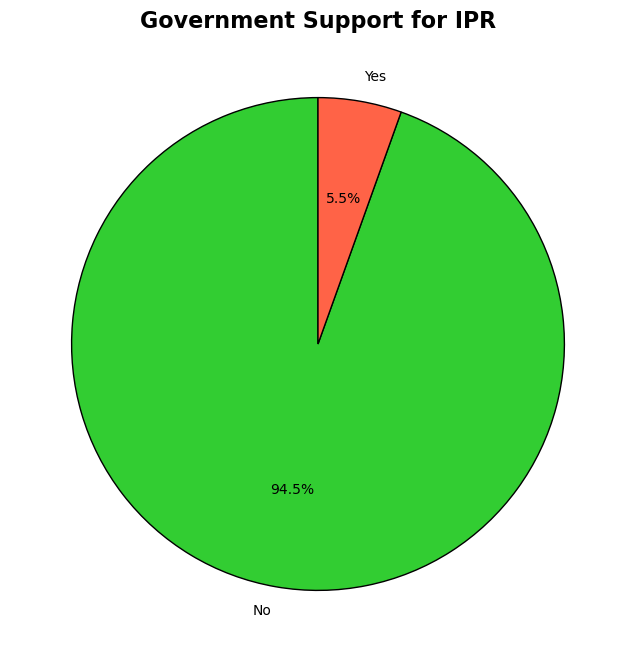

In [66]:
# Standardize the 'govt_suppport_for_ipr' column values to lowercase
data['govt_suppport_for_ipr'] = data['govt_suppport_for_ipr'].str.lower()

# Count the occurrences of each category
ipr_support = data['govt_suppport_for_ipr'].value_counts()

# Ensure the labels only show 'yes' or 'no'
labels = ['Yes' if label == 'yes' else 'No' for label in ipr_support.index]
colors = ['#32CD32', '#FF6347']  # Green for supported, Red for not supported

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ipr_support, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Government Support for IPR', fontsize=16, fontweight='bold')
plt.show()



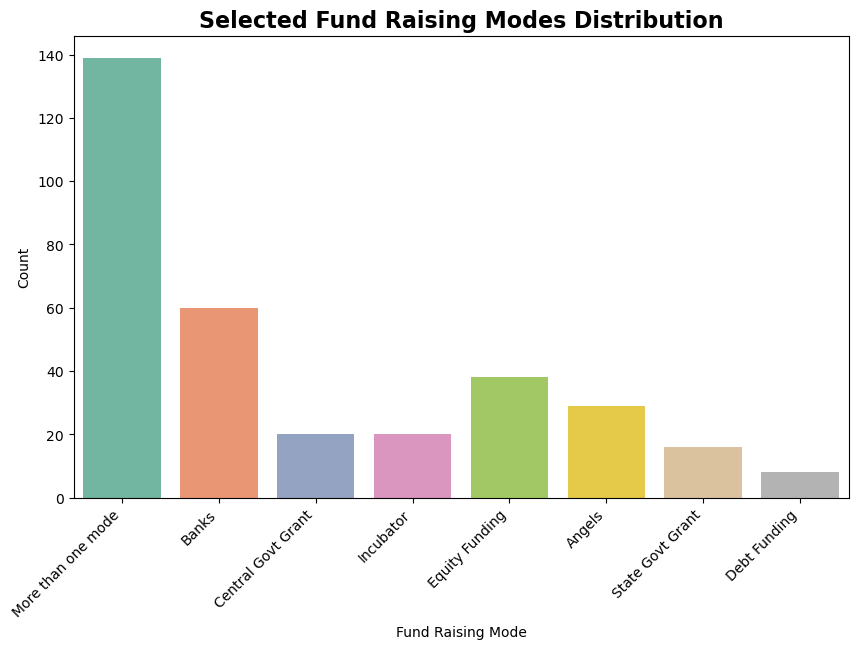

In [69]:
# List of selected fund-raising modes to display
selected_modes = ['More than one mode','Banks','Incubator','Angels','Equity Funding', 'Debt Funding', 'Central Govt Grant', 'Venture Capital', 'State Govt Grant']

# Filter the dataset to include only the selected modes
filtered_data = data[data['fund_raised_mode'].isin(selected_modes)]

# Plot the bar chart with selected modes
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='fund_raised_mode', palette='Set2')
plt.title('Selected Fund Raising Modes Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Fund Raising Mode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.show()



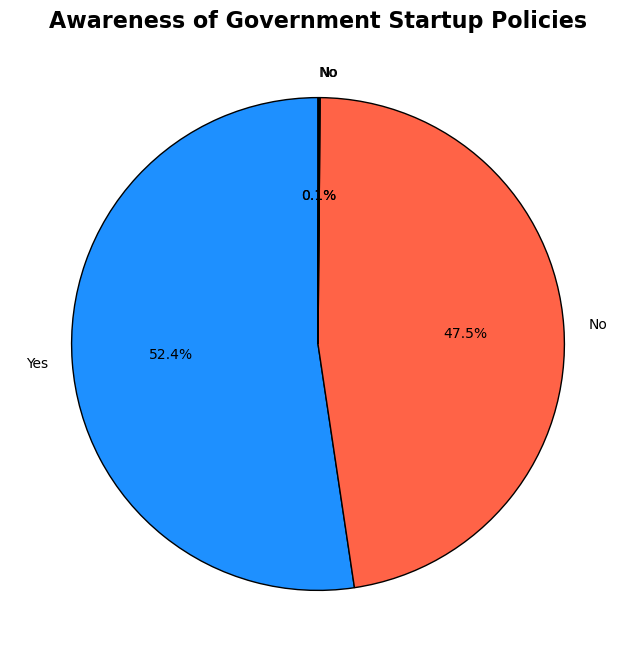

In [65]:
# Standardize the 'awre_of_g.o_and_state_govet_startup_policies' column values to lowercase
data['awre_of_g.o_and_state_govet_startup_policies'] = data['awre_of_g.o_and_state_govet_startup_policies'].str.lower()

# Count the occurrences of each category
policy_awareness = data['awre_of_g.o_and_state_govet_startup_policies'].value_counts()

# Ensure the labels only show 'yes' or 'no'
labels = ['Yes' if label == 'yes' else 'No' for label in policy_awareness.index]
colors = ['#1E90FF', '#FF6347']  # Blue for aware, Red for not aware

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(policy_awareness, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Awareness of Government Startup Policies', fontsize=16, fontweight='bold')
plt.show()

